In [ ]:
results_folder = 'final_results'
from scripts.presentation2 import parse_results_from_folder, form_matrix, plot_matrix, form_matrices, matrix_merger, get_base_score_matrix
df = parse_results_from_folder(results_folder)
df.head(4)

,BLEU,chrF,BERT-F1,COMET,dataset,translator,src_lang,tgt_lang
0,34.060691,62.410104,87.193665,87.752561,ep,deepl,da,de
1,28.739547,55.275677,85.196410,89.326129,ep,deepl,da,el
2,40.892690,63.898571,89.161670,86.687622,ep,deepl,da,en
3,37.117352,61.804831,87.723620,86.294007,ep,deepl,da,es


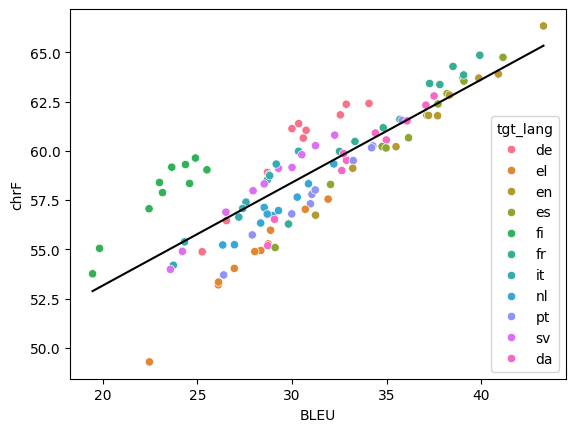

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scripts.presentation2 import prepare_variable
from scipy.stats import pearsonr, spearmanr

def linear_regression(df, config1, config2, x_label, y_label, color_by=None, label_map=None, plot=True):
    df1 = prepare_variable(df, config1['metric'], config1['datasets'],
                           config1['translators'], config1['src_lang'], config1['tgt_lang'])
    df2 = prepare_variable(df, config2['metric'], config2['datasets'],
                           config2['translators'], config2['src_lang'], config2['tgt_lang'])
    merge_on = ['src_lang', 'tgt_lang']
    if len(config1['datasets']) > 1:
        merge_on.append('dataset')

    merged = df1.merge(df2, on=merge_on, suffixes=('_x', '_y'))
    model = np.polyfit(merged['score_x'], merged['score_y'], 1)
    x_line = np.linspace(merged['score_x'].min(),
                        merged['score_x'].max(), 100)
    y_line = model[0] * x_line + model[1]
    
    sns.scatterplot(
        data=merged,
        x='score_x',
        y='score_y',
        hue=color_by
    )
    plt.plot(x_line, y_line, color='black')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    return merged, model


config1 = {
    'datasets': ['ep'],
    'translators': ['deepl'],
    'src_lang': None,
    'tgt_lang': None,
    'metric': 'BLEU'
}
config2 = {
    'datasets': ['ep'],
    'translators': ['deepl'],
    'src_lang': None,
    'tgt_lang': None,
    'metric': 'chrF'
}

data, model = linear_regression(df, config1, config2, 'BLEU', 'chrF', color_by='tgt_lang')

### Matrix Stuff

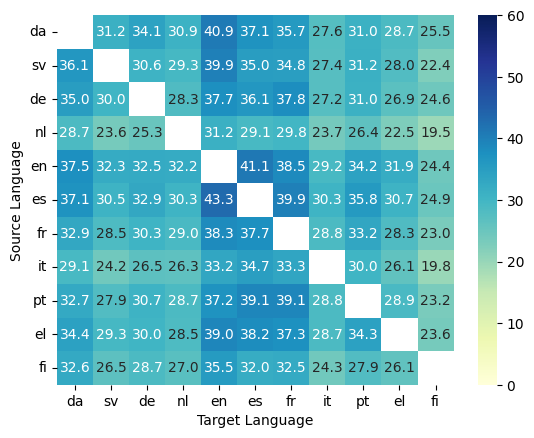

In [ ]:
import os
import pandas as pd
results_folder = 'final_results'
from scripts.presentation2 import parse_results_from_folder, form_matrix, plot_matrix, form_matrices, matrix_merger, get_base_score_matrix
df = parse_results_from_folder(results_folder)

matrices = form_matrices(df, 'BLEU', ['deepl', 'gpt']*3, ['ep', 'flores', 'opus']*2)
plot_matrix(matrices[('ep', 'deepl')])

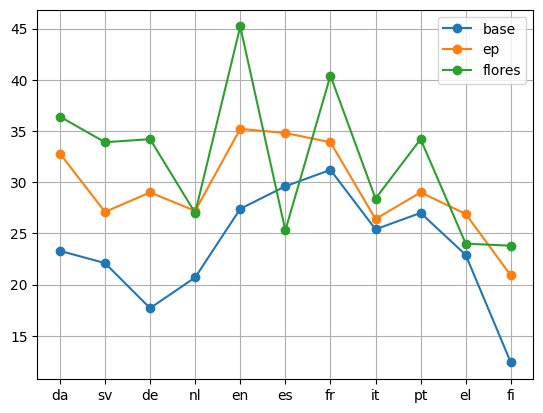

In [39]:
from scripts.presentation2 import aggregate_matrices, extract_vectors, plot_vectors

merged = matrix_merger(matrices, 'dataset')
ag = aggregate_matrices(merged, mode='INTO', include_base=True)
plot_vectors(ag, include_base=True)

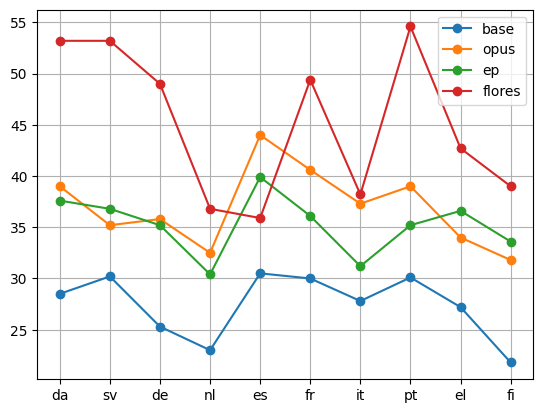

In [46]:
ve = extract_vectors(merged, mode='INTO', lang='en', include_base=True)
plot_vectors(ve, include_base=True)